#  Linear Regression

## Lab Assignment - Ocean Salinity Prediction

The temp_salinity.csv file contains data of ocean, its temperature and salinity. We have to predict the salinity of the water based on its temperature. 

Perform regression analysis on the data, and answer the following questions.

#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 
#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 
#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.
#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 
#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 
#### 6. Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify. 
#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [2]:
import pandas as pd
df = pd.read_csv('temp_salinity.csv')
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


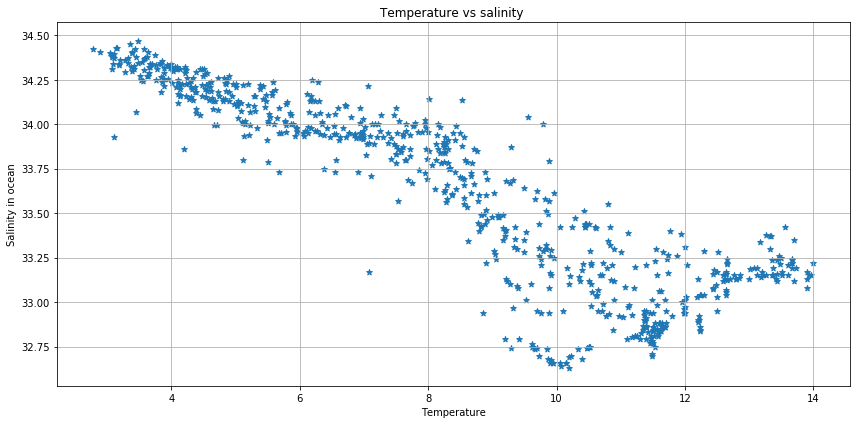

In [3]:
#Q1
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
df1= df.dropna()
df1.head()

plt.figure(figsize=[12,6])
plt.title("Temperature vs salinity ")
plt.ylabel("Salinity in ocean")
plt.xlabel("Temperature")
plt.scatter(df1['T_degC'],df1['Salnty'],marker="*")
plt.axis()
plt.grid(True)
plt.tight_layout()
plt.grid(True)

In [4]:
#Q2
mean=df1['Salnty'].mean()
print("Mean is {0}".format(mean))
std=df1['Salnty'].std()*2
print("Salinity is {0}".format(std))

data_new=df1[df1['Salnty'][::]-df1['Salnty'][1::]>std]
print(data_new)

Mean is 33.61958896551724
Salinity is 1.0554214719675683
Empty DataFrame
Columns: [T_degC, Salnty]
Index: []


Slope(m) is -0.15 and Intercept is34.89


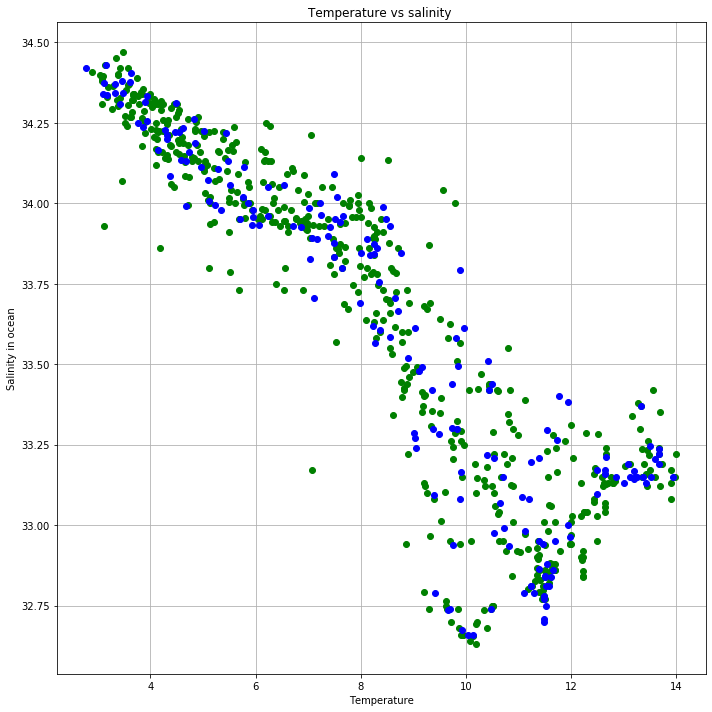

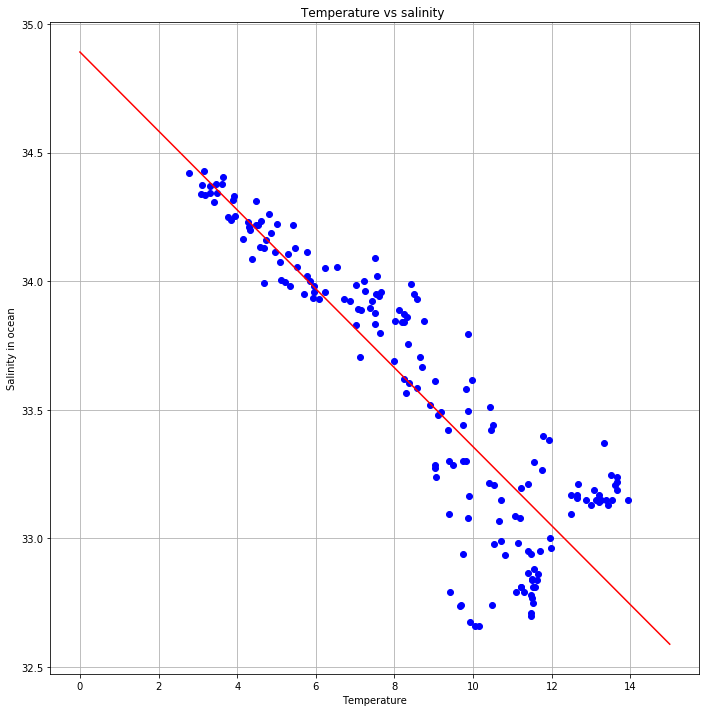

In [5]:
#Q4a
from sklearn.model_selection import train_test_split
temp_train,temp_test,sal_train,sal_test=train_test_split(df1['T_degC'],df1['Salnty'],test_size=0.25)
#other arguments - random_state=none,shuffle=True
# print(temp_train)
# print(temp_test)
# print(sal_train)
# print(sal_test)

plt.figure(figsize=[10,10])
plt.title("Temperature vs salinity ")
plt.xlabel("Temperature")
plt.ylabel("Salinity in ocean")
plt.plot(temp_train,sal_train,'go')
plt.plot(temp_test,sal_test,'bo')
plt.axis()
plt.grid(True)

plt.tight_layout()


#Q4b
x_train=temp_train.values.reshape(-1,1)
y_train=sal_train.values.reshape(-1,1)
x_test=temp_test.values.reshape(-1,1)
y_test=sal_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

#create and fit the model

model = LinearRegression()
model.fit(x_train,y_train)

# print(y_test) #actual output
# print(model.predict(x_test))#predicted output

#Q4c
plt.figure(figsize=[10,10])
plt.title("Temperature vs salinity ")
plt.xlabel("Temperature")
plt.ylabel("Salinity in ocean")
#plt.plot(temp_train,sal_train,'go')
plt.plot(temp_test,sal_test,'bo')
plt.axis()
plt.grid(True)
plt.tight_layout()

#plot regression solution line

plt.plot([0,15],[model.predict([[0]])[0][0],model.predict([[15]])[0][0]], color= 'r')
print("Slope(m) is %.2f and Intercept is%.2f"%(model.coef_, model.intercept_)) 
      

[[33.27788743]
 [33.47570245]
 [34.23914476]
 [33.29334173]
 [34.29168937]
 [33.27016029]
 [34.00114857]
 [34.1062378 ]
 [32.78025905]
 [34.05369318]
 [33.13879875]
 [32.97034691]
 [33.66424488]
 [32.81734936]
 [34.37977887]
 [33.36597693]
 [34.10314694]
 [33.95787654]
 [33.79869727]
 [33.37370408]
 [33.50197475]
 [34.11705581]
 [33.7121532 ]
 [33.0476184 ]
 [33.09398129]
 [34.27314421]
 [33.39997639]
 [33.71833492]
 [34.33805226]
 [33.11870817]
 [33.10325387]
 [33.35361349]
 [33.37370408]
 [34.40605117]
 [32.84207624]
 [34.09851065]
 [34.32568883]
 [33.90069564]
 [33.88215048]
 [32.81580393]
 [34.29787109]
 [33.99960314]
 [33.3798858 ]
 [32.77098647]
 [33.39379467]
 [32.82662194]
 [34.37977887]
 [33.27788743]
 [32.85443968]
 [34.2623262 ]
 [34.30250738]
 [33.80796985]
 [33.61633656]
 [33.49733846]
 [32.74471416]
 [34.34114312]
 [33.94087681]
 [33.62869999]
 [33.28561458]
 [34.35505199]
 [33.03834582]
 [34.24223562]
 [34.21596331]
 [34.41223289]
 [33.79097012]
 [34.14487354]
 [33.52824

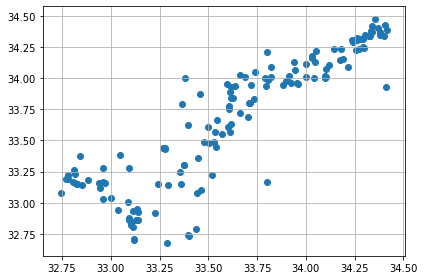

In [9]:
#Q5a
print(model.predict(x_test))
print(model.predict(y_test))


#Q5b
print(model.score(x_test,y_test)) #r^2 coefficent

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(x_test), multioutput = 'uniform_average')

print("MSE IS",mse )

#Q5c

plt.figure()
plt.scatter(model.predict(x_test),y_test)
plt.grid()
plt.axis()
plt.tight_layout()

Slope(m) is -0.15 and Intercept is34.89


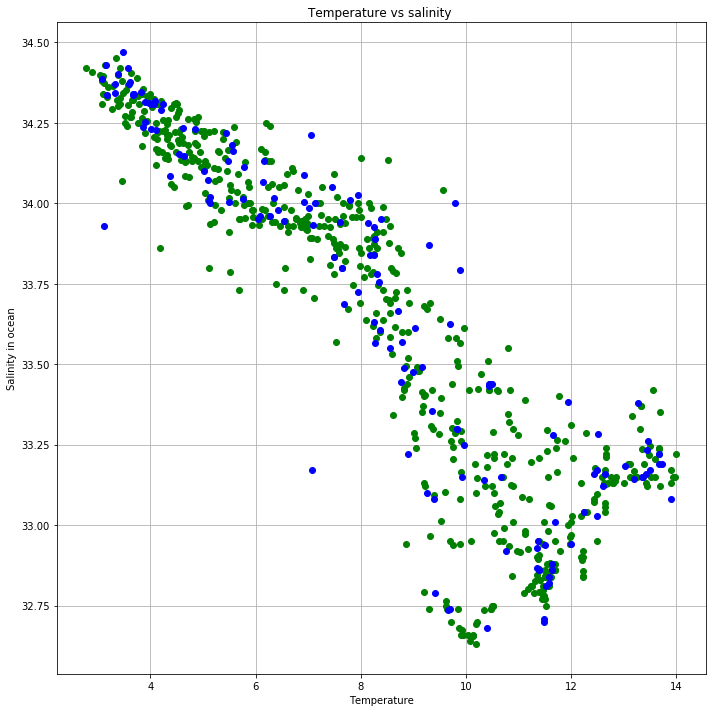

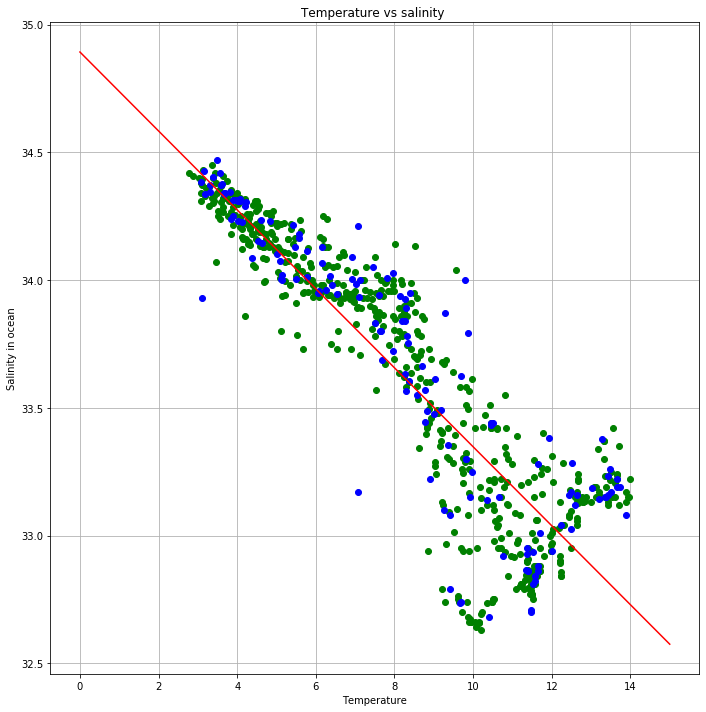

In [7]:
#Q6

from sklearn.model_selection import train_test_split
temp_train,temp_test,sal_train,sal_test=train_test_split(df1['T_degC'],df1['Salnty'],test_size=0.2)
#other arguments - random_state=none,shuffle=True
# print(temp_train)
# print(temp_test)
# print(sal_train)
# print(sal_test)

plt.figure(figsize=[10,10])
plt.title("Temperature vs salinity ")
plt.xlabel("Temperature")
plt.ylabel("Salinity in ocean")
plt.plot(temp_train,sal_train,'go')
plt.plot(temp_test,sal_test,'bo')
plt.axis()
plt.grid(True)

plt.tight_layout()


#Q4b
x_train=temp_train.values.reshape(-1,1)
y_train=sal_train.values.reshape(-1,1)
x_test=temp_test.values.reshape(-1,1)
y_test=sal_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression

#create and fit the model

model = LinearRegression()
model.fit(x_train,y_train)

# print(y_test) #actual output
# print(model.predict(x_test))#predicted output

#Q4c
plt.figure(figsize=[10,10])
plt.title("Temperature vs salinity ")
plt.xlabel("Temperature")
plt.ylabel("Salinity in ocean")
plt.plot(temp_train,sal_train,'go')
plt.plot(temp_test,sal_test,'bo')
plt.axis()
plt.grid(True)
plt.tight_layout()

#plot regression solution line

plt.plot([0,15],[model.predict([[0]])[0][0],model.predict([[15]])[0][0]], color= 'r')
print("Slope(m) is %.2f and Intercept is%.2f" 
      %(model.coef_, model.intercept_)) 
      

In [8]:
#Q7
from sklearn.model_selection import cross_val_score
from sklearn import metrics
for i in range(3,11):
    scores = cross_val_score(model,df1['T_degC'].values.reshape(-1,1),df1['Salnty'].values.reshape(-1,1), cv=i)
    print("Cross-valinated scores:",scores)
    print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2))                         

Cross-valinated scores: [0.73447242 0.8416111  0.46115279]
Accuracy: 0.68 (+/- 0.32)
Cross-valinated scores: [0.69355953 0.8737289  0.84607782 0.32053699]
Accuracy: 0.68 (+/- 0.44)
Cross-valinated scores: [0.64227254 0.90209738 0.85046584 0.78037495 0.41413809]
Accuracy: 0.72 (+/- 0.35)
Cross-valinated scores: [0.67258255 0.82883796 0.85506034 0.85687083 0.69067212 0.5743296 ]
Accuracy: 0.75 (+/- 0.21)
Cross-valinated scores: [0.63917362 0.80970463 0.89490719 0.82943044 0.82793808 0.47303327
 0.74438908]
Accuracy: 0.75 (+/- 0.27)
Cross-valinated scores: [0.69776333 0.71528441 0.90769887 0.84336772 0.85846563 0.79770495
 0.27529712 0.74439291]
Accuracy: 0.73 (+/- 0.37)
Cross-valinated scores: [0.65436225 0.68720171 0.91605611 0.84845427 0.8629302  0.84208488
 0.83789235 0.21795983 0.73933214]
Accuracy: 0.73 (+/- 0.40)
Cross-valinated scores: [0.647286   0.67342518 0.91192349 0.88394689 0.86653959 0.85886846
 0.73657739 0.78940619 0.39544681 0.73126865]
Accuracy: 0.75 (+/- 0.29)
